In [2]:
import numpy as np
import random
#import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


def hardselect(M,n,p):
    size = int(np.floor(n*p))
    degree_seq = np.array(np.sum(M, axis = 1)[0:n])
    if size == 0:
        taboo = np.array([], dtype = int)
    else:
        taboo = np.argpartition(degree_seq, -size)[-size:]
    return np.array(taboo)
    

def softselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def softselect_one(M,n):
    size = 1
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def simulate_graph(N,p,mode = "hard",seed = 1):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    np.random.seed(seed)
    for i in range(2,N):
        if mode == "hard":
            taboo = hardselect(M,i,p)
        elif mode == "soft":
            taboo = softselect(M,i,p)
        elif mode == "soft_one":
            taboo = softselect_one(M,i)
        else:
            raise ValueError("no such mode of selecting taboo")
        
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    #deg_seq = np.sum(M, axis = 1)
    #max_deg = max(np.sum(M, axis = 1))

    return M

def find_maximal(N,p,mode = "hard", seed = 1):
    M = simulate_graph(N,p,mode,seed)
    return max(np.sum(M, axis = 1))

def maximal_plot(N,p,S,mode = "hard", seed = 1):
    inputs = range(0,S)
    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(find_maximal)(N,p,mode,(seed+i)) for i in inputs)
    plt.figure(figsize = (12,6),facecolor='whitesmoke')
    plt.bar(np.arange(0,max(mylist)+1), np.bincount(mylist, minlength=max(mylist))/S)
    titlename = f"seed = {seed} || Maximal degree distribution in Graph of size {N} and p={p} -- {mode}-coded taboo : Number of iter = {S}"
    filename = titlename + ".png"
    plt.title(titlename)
    plt.xlabel("maximal degree"); plt.ylabel("relative frequency")
    plt.savefig(fname = filename, dpi = 600)
    return mylist



CPU times: user 24.7 s, sys: 2.2 s, total: 26.9 s
Wall time: 16min 20s


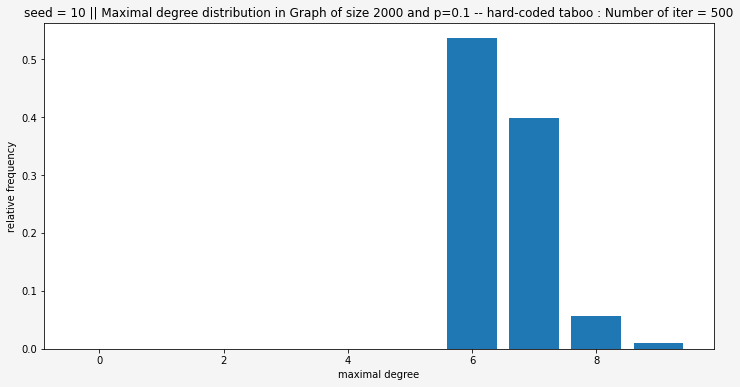

In [15]:
%%time
x11 = maximal_plot(2000,.1,500,mode = "hard",seed=10)

CPU times: user 22.4 s, sys: 1.57 s, total: 24 s
Wall time: 14min 41s


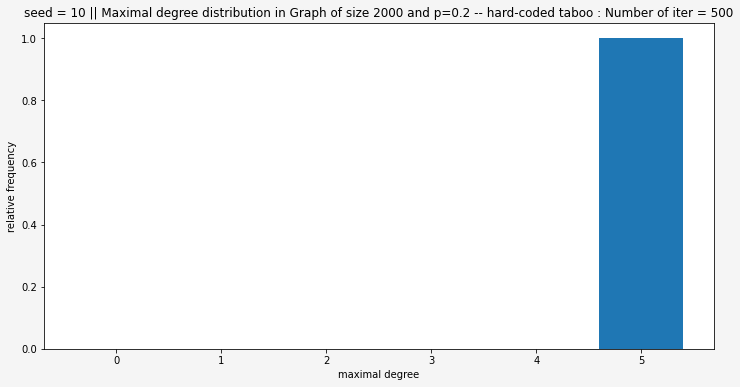

In [16]:
%%time
x12 = maximal_plot(2000,.2,500,mode = "hard",seed=10)

CPU times: user 20.4 s, sys: 1.9 s, total: 22.3 s
Wall time: 13min 2s


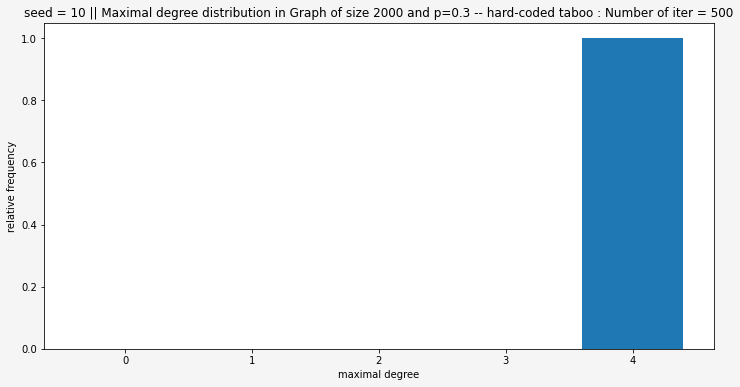

In [20]:
%%time
x13 = maximal_plot(2000,.3,500,mode = "hard",seed=10)

CPU times: user 20.3 s, sys: 1.2 s, total: 21.5 s
Wall time: 12min 21s


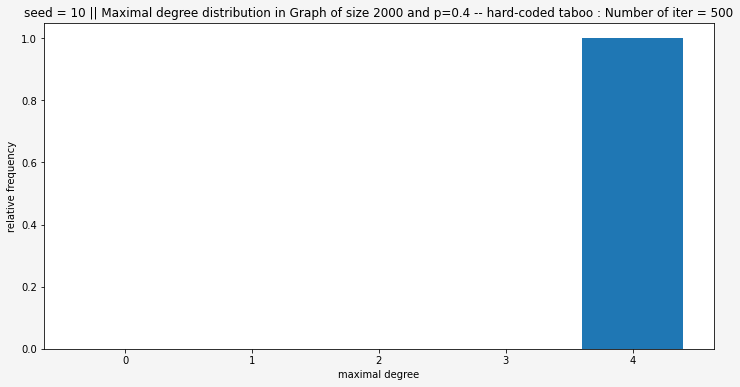

In [21]:
%%time
x14 = maximal_plot(2000,.4,500,mode = "hard",seed=10)

CPU times: user 19.5 s, sys: 1.23 s, total: 20.8 s
Wall time: 11min 37s


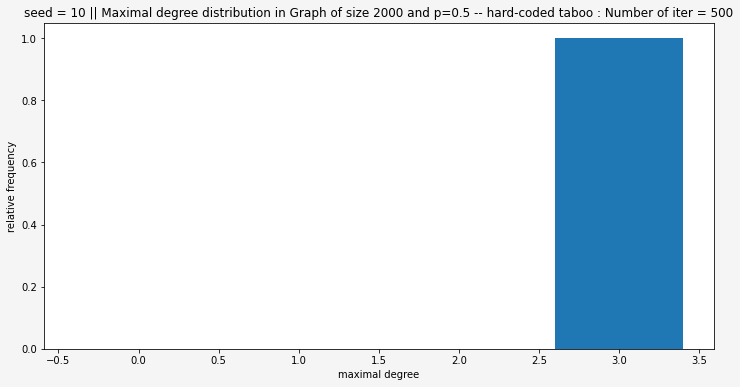

In [22]:
%%time
x15 = maximal_plot(2000,.5,500,mode = "hard",seed=10)

CPU times: user 1min 45s, sys: 5.1 s, total: 1min 50s
Wall time: 45min 19s


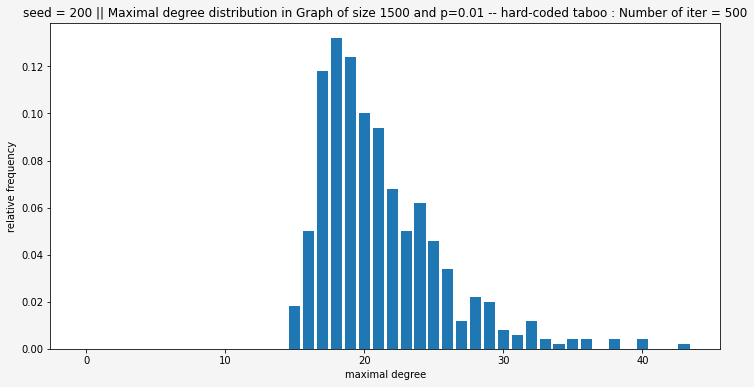

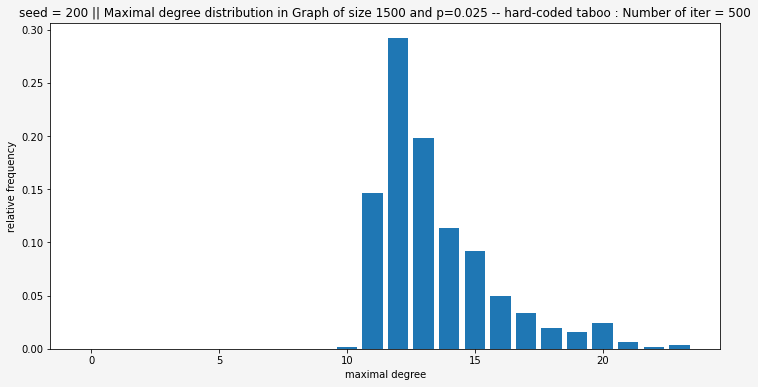

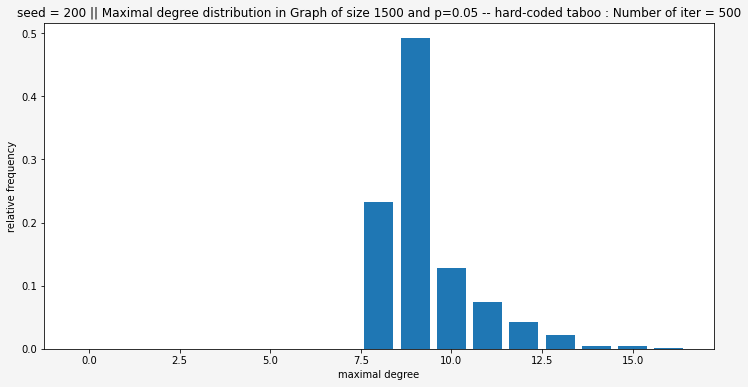

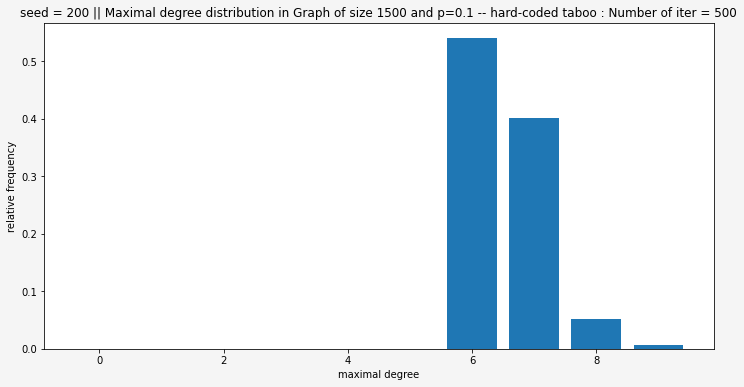

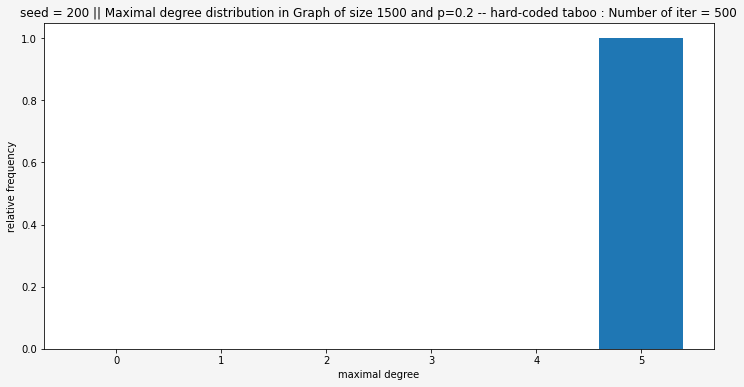

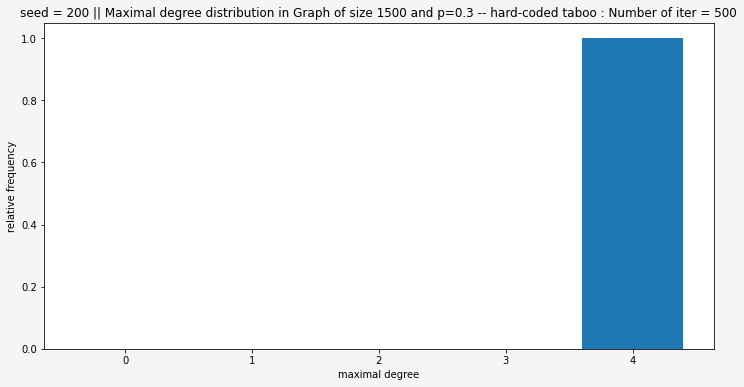

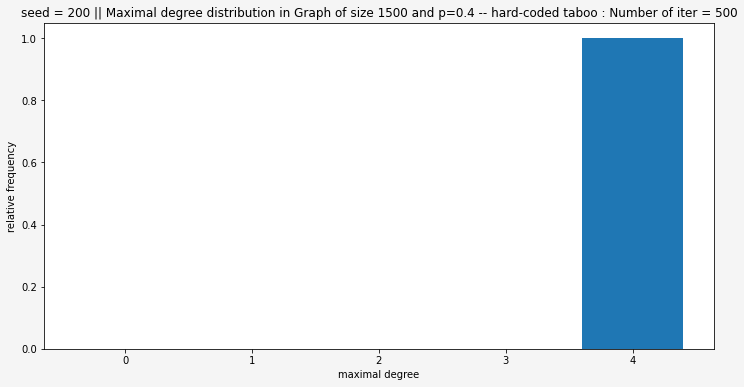

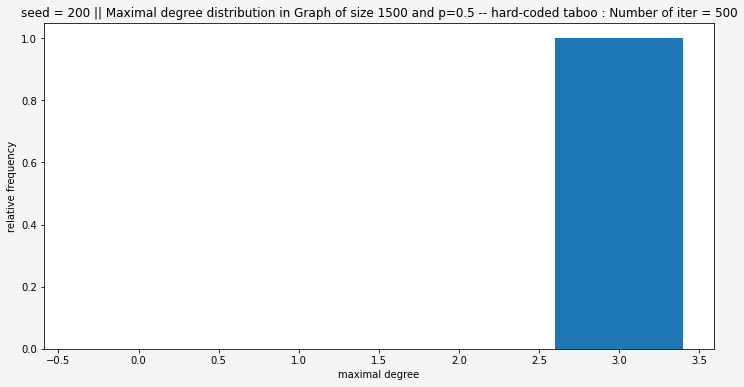

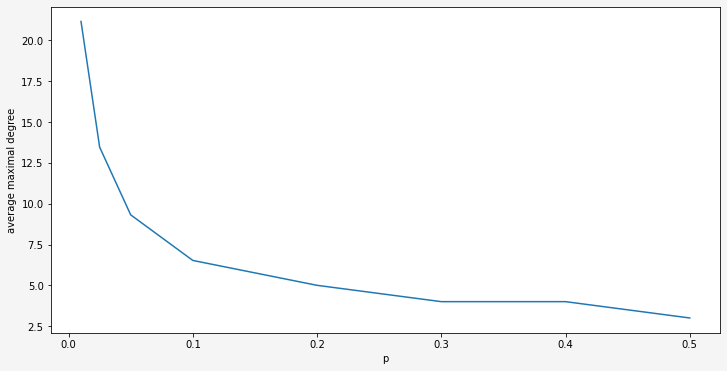

In [13]:
%%time
M_hardp = np.zeros((8,500))
p = [0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(0,len(p)):
  z = maximal_plot(1500, p[i], 500, mode = "hard", seed = 200)
  M_hardp[i] = z

means_hardp = np.sum(M_hardp, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(p,means_hardp); plt.xlabel("p"); plt.ylabel("average maximal degree")

CPU times: user 1min 36s, sys: 4.33 s, total: 1min 40s
Wall time: 36min 22s


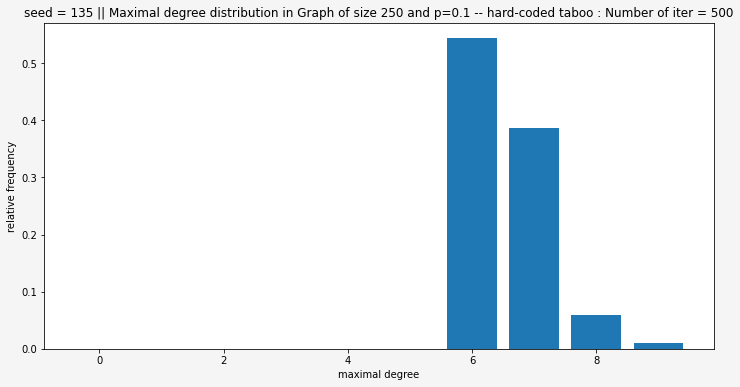

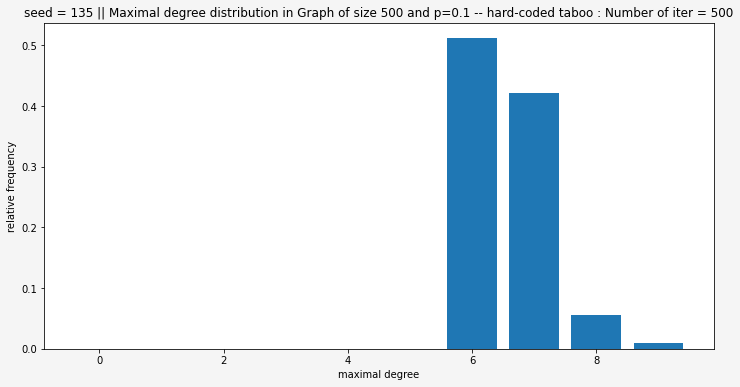

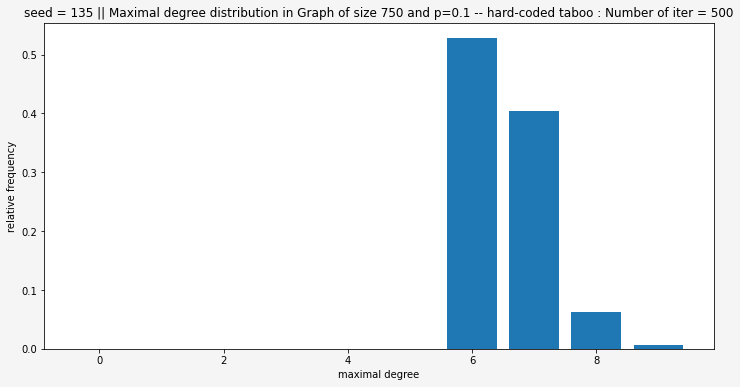

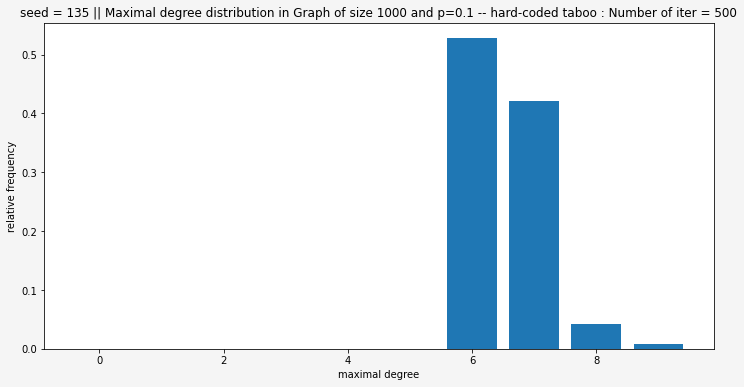

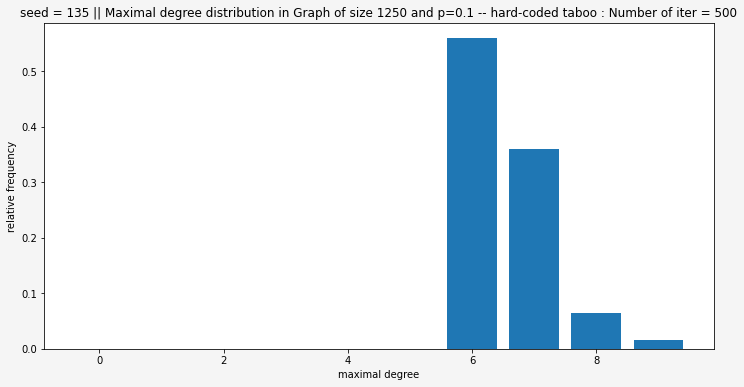

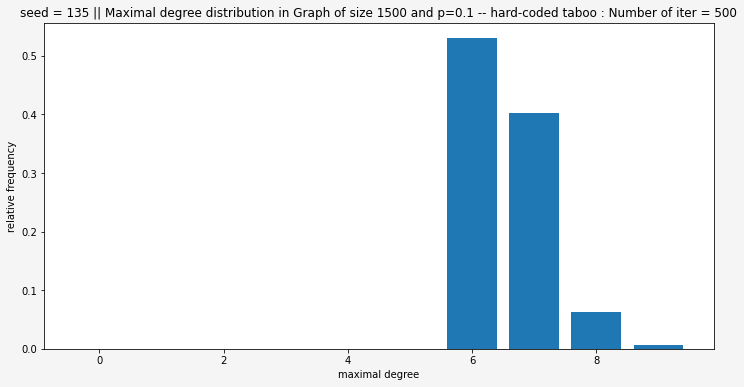

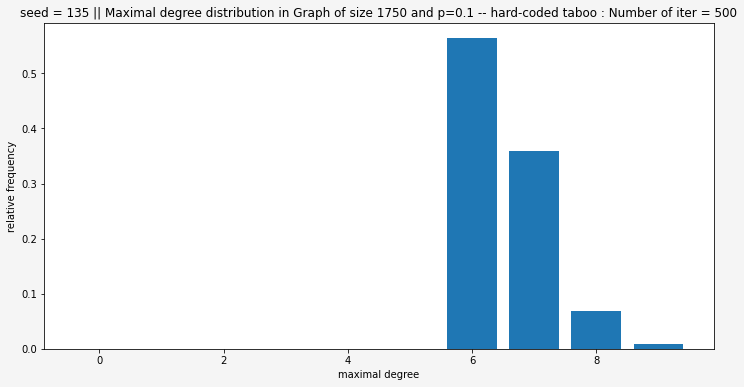

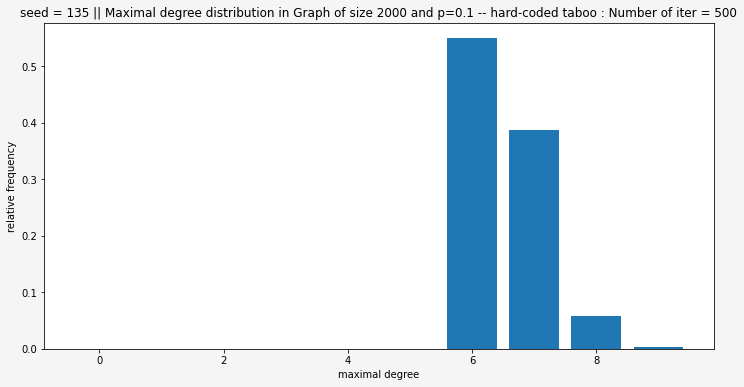

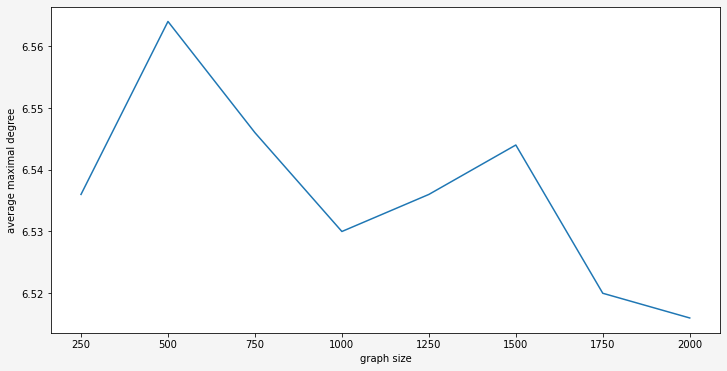

In [14]:
%%time
M_hardN = np.zeros((8,500))
N = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
for i in range(0,len(N)):
  z = maximal_plot(N[i], 0.1, 500, mode = "hard", seed = 135)
  M_hardN[i] = z
means_hardN = np.sum(M_hardN, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(N,means_hardN); plt.xlabel("graph size"); plt.ylabel("average maximal degree")

#### basically same

CPU times: user 28.1 s, sys: 2.14 s, total: 30.2 s
Wall time: 18min 14s


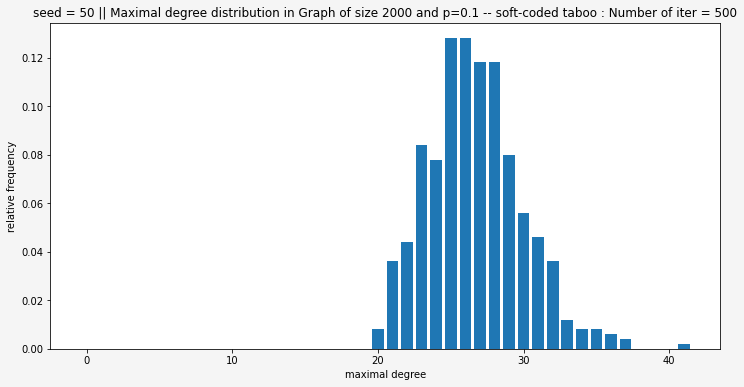

In [28]:
%%time
x21 = maximal_plot(2000,.1,500,mode = "soft",seed=50)

CPU times: user 23 s, sys: 1.47 s, total: 24.5 s
Wall time: 16min 55s


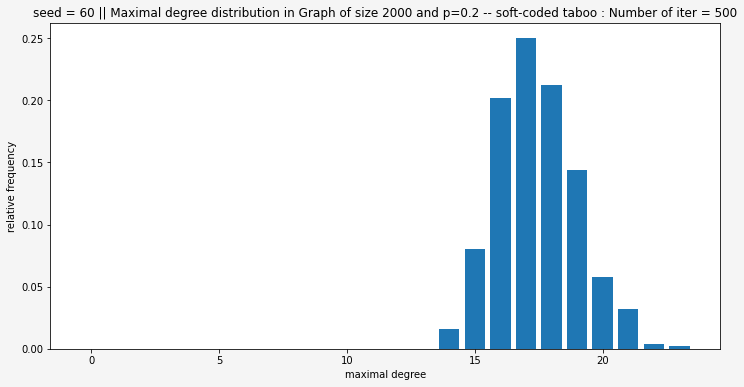

In [29]:
%%time
x22 = maximal_plot(2000,.2,500,mode = "soft",seed=60)

CPU times: user 27.1 s, sys: 2.52 s, total: 29.6 s
Wall time: 16min 42s


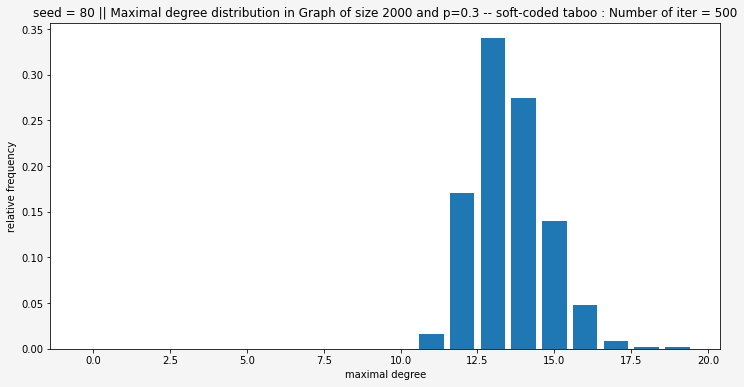

In [33]:
%%time
x23 = maximal_plot(2000,.3,500,mode = "soft",seed=80)

CPU times: user 24 s, sys: 1.73 s, total: 25.7 s
Wall time: 14min 24s


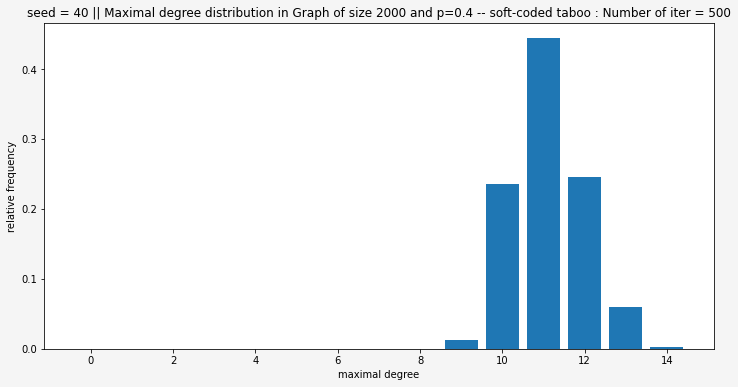

In [34]:
%%time
x24 = maximal_plot(2000,.4,500,mode = "soft",seed=40)

CPU times: user 25.5 s, sys: 1.94 s, total: 27.4 s
Wall time: 14min 56s


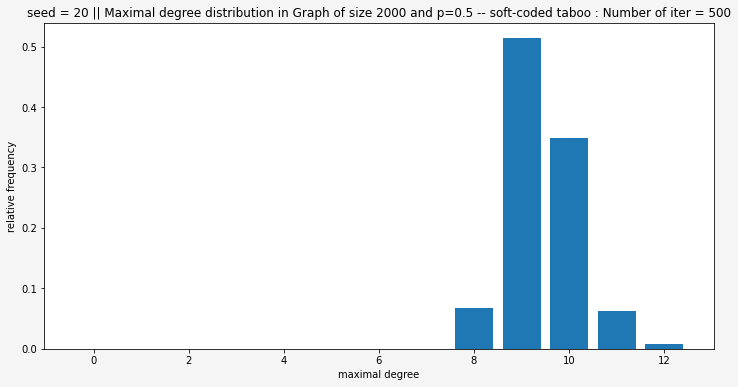

In [35]:
%%time
x25 = maximal_plot(2000,.5,500,mode = "soft",seed=20)

CPU times: user 1min 47s, sys: 5.57 s, total: 1min 53s
Wall time: 48min 3s


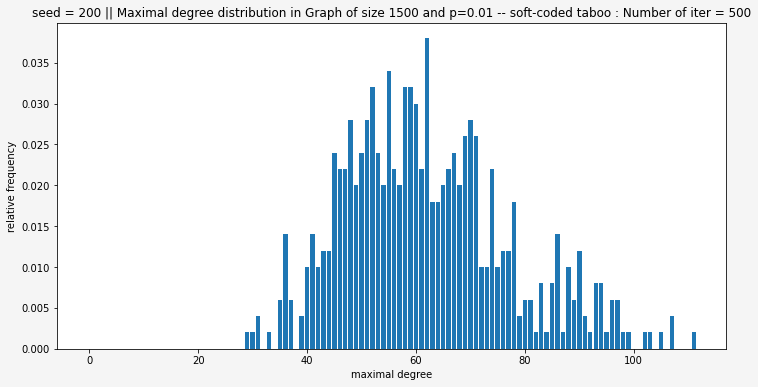

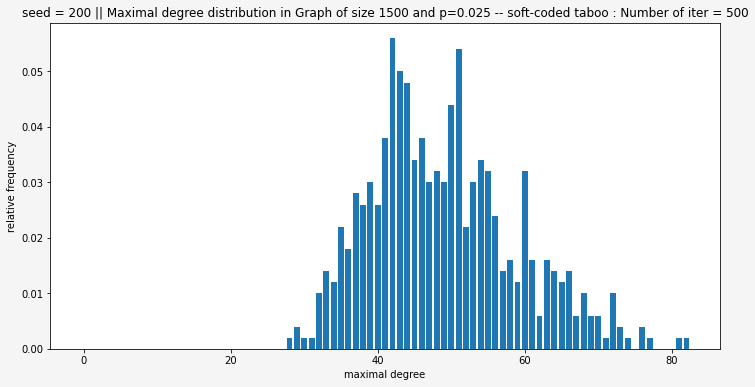

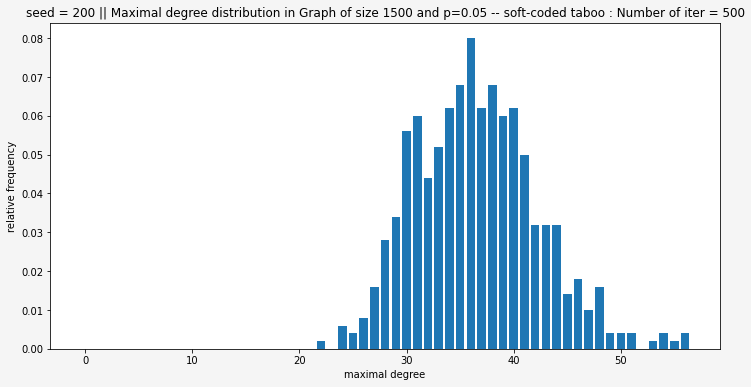

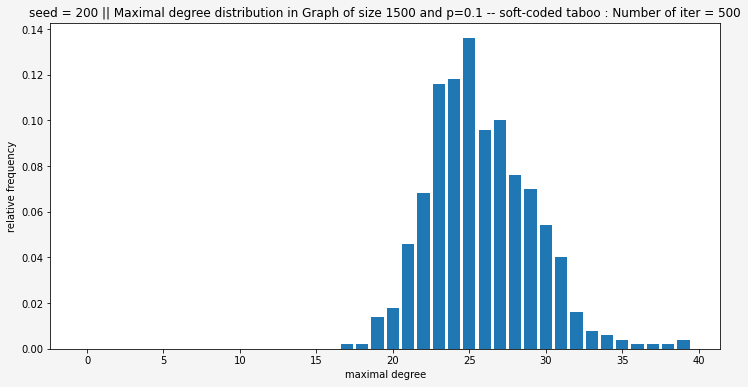

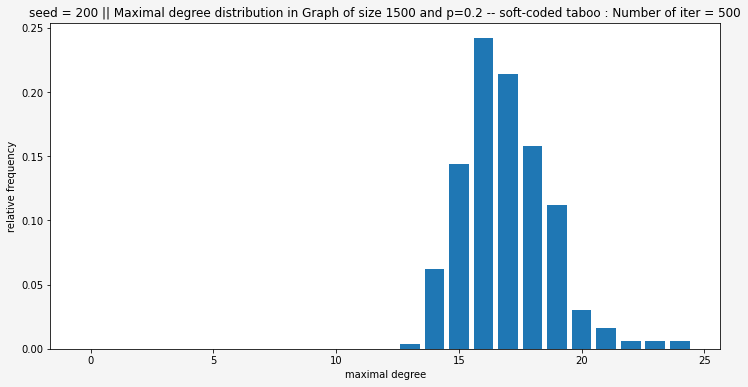

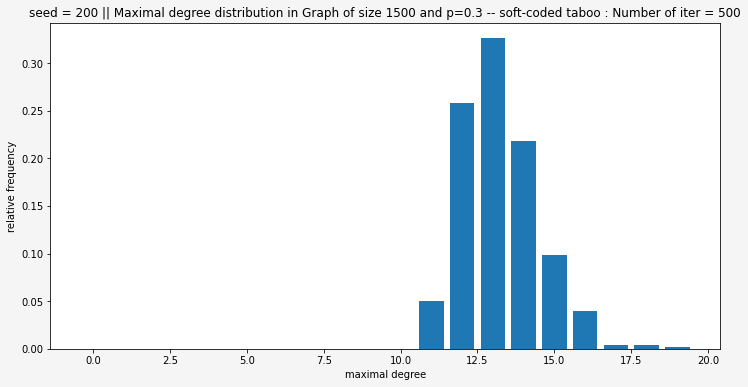

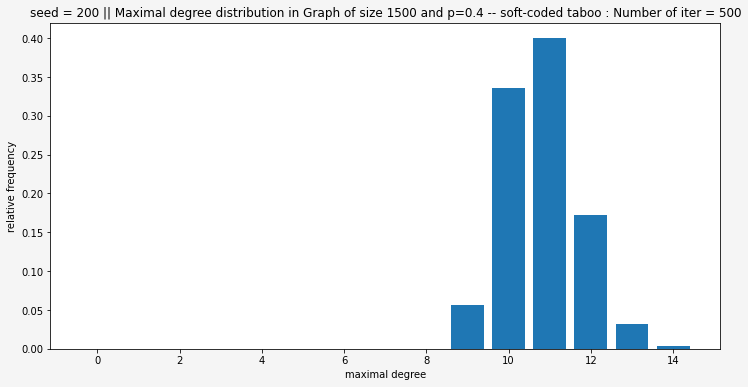

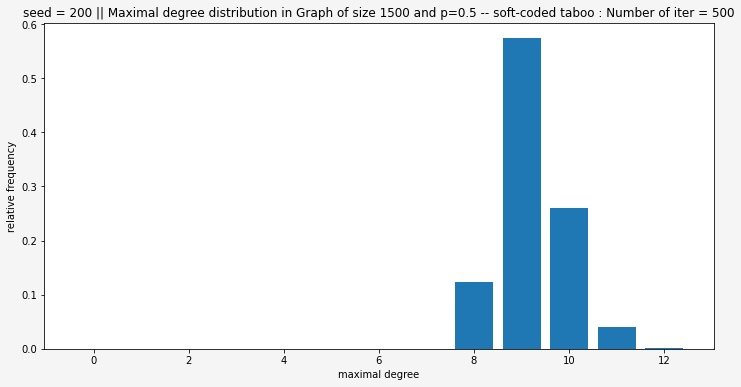

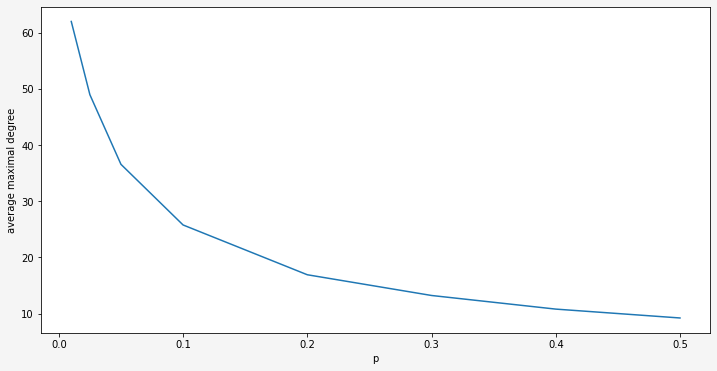

In [15]:
%%time
M_softp = np.zeros((8,500))
p = [0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(0,len(p)):
  z = maximal_plot(1500, p[i], 500, mode = "soft", seed = 200)
  M_softp[i] = z

means_softp = np.sum(M_softp, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(p,means_softp); plt.xlabel("p"); plt.ylabel("average maximal degree")

CPU times: user 1min 39s, sys: 4.54 s, total: 1min 44s
Wall time: 39min


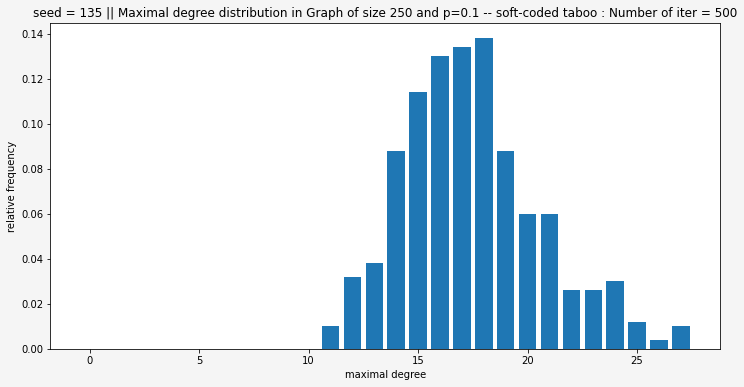

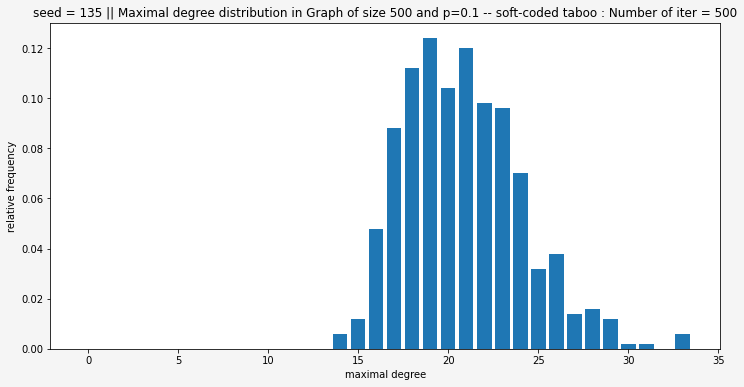

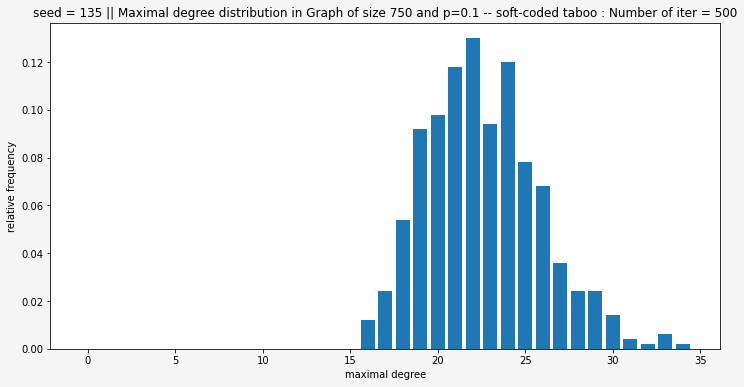

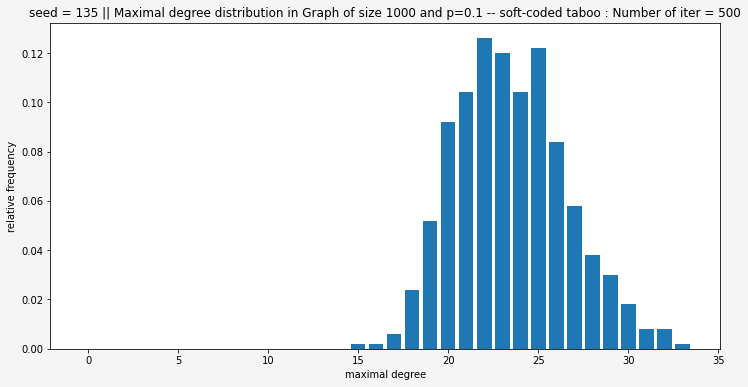

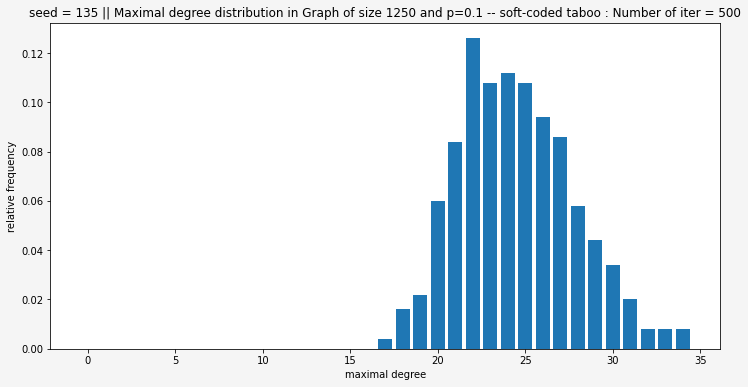

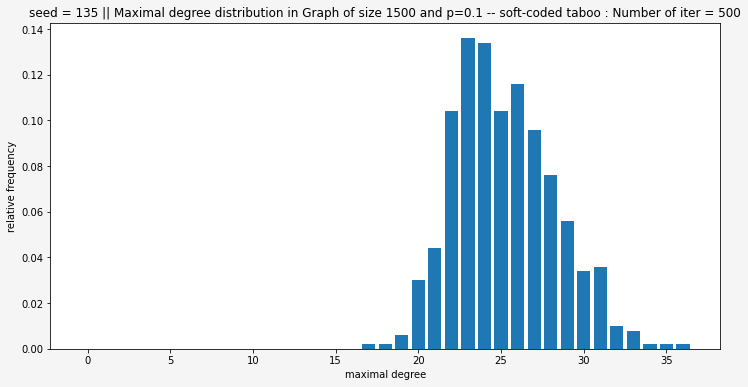

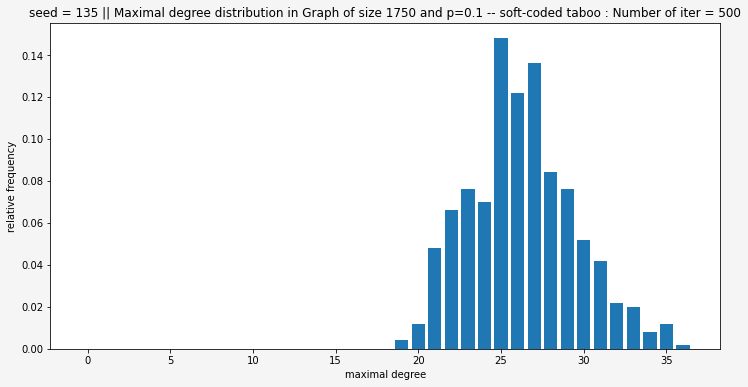

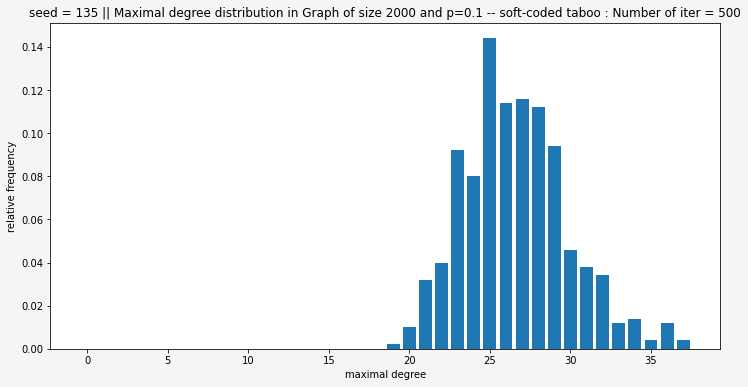

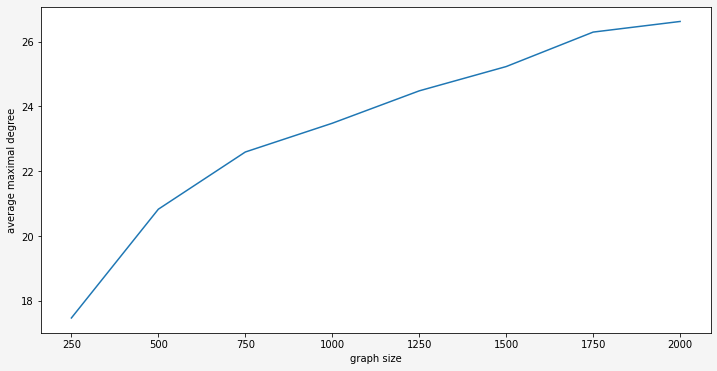

In [16]:
%%time
M_softN = np.zeros((8,500))
N = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
for i in range(0,len(N)):
  z = maximal_plot(N[i], 0.1, 500, mode = "soft", seed = 135)
  M_softN[i] = z
means_softN = np.sum(M_softN, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(N,means_softN); plt.xlabel("graph size"); plt.ylabel("average maximal degree")

CPU times: user 20.8 s, sys: 1.74 s, total: 22.5 s
Wall time: 15min 25s


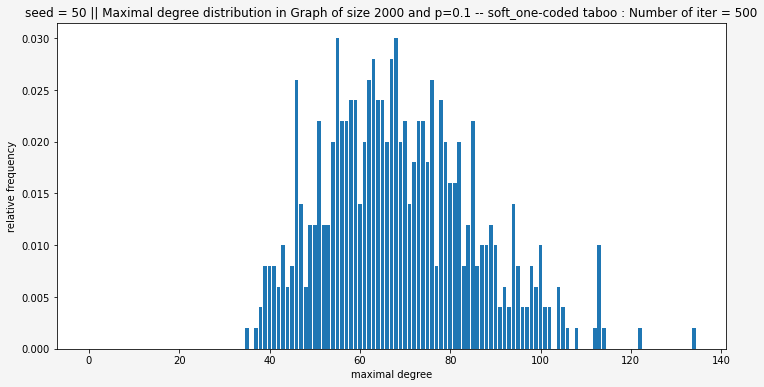

In [40]:
%%time
x31 = maximal_plot(2000,.1,500,mode = "soft_one",seed=50)

CPU times: user 16.9 s, sys: 764 ms, total: 17.7 s
Wall time: 15min 25s


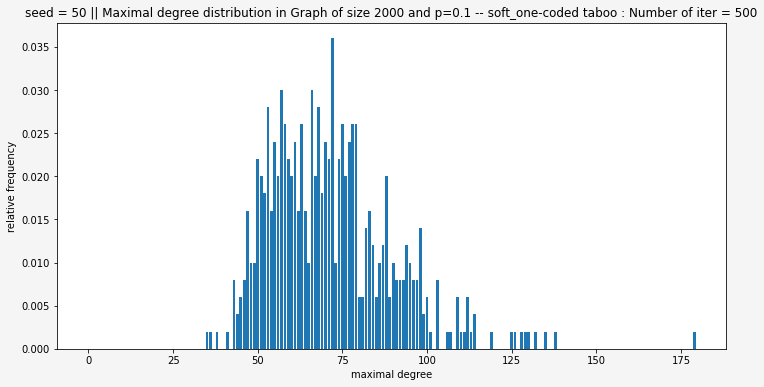

In [41]:
%%time
x32 = maximal_plot(2000,.1,500,mode = "soft_one",seed=50)

CPU times: user 22 s, sys: 2.25 s, total: 24.2 s
Wall time: 16min 4s


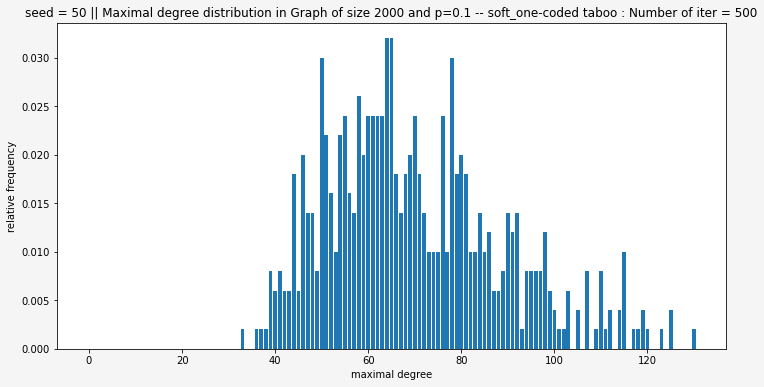

In [3]:
%%time
x33 = maximal_plot(2000,.1,500,mode = "soft_one",seed=50)

CPU times: user 28.4 s, sys: 2.76 s, total: 31.1 s
Wall time: 20min 28s


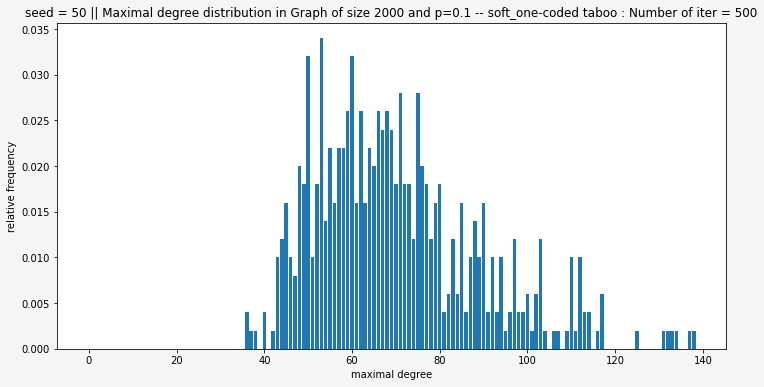

In [4]:
%%time
x34 = maximal_plot(2000,.1,500,mode = "soft_one",seed=50)

CPU times: user 19.8 s, sys: 1.57 s, total: 21.3 s
Wall time: 15min 35s


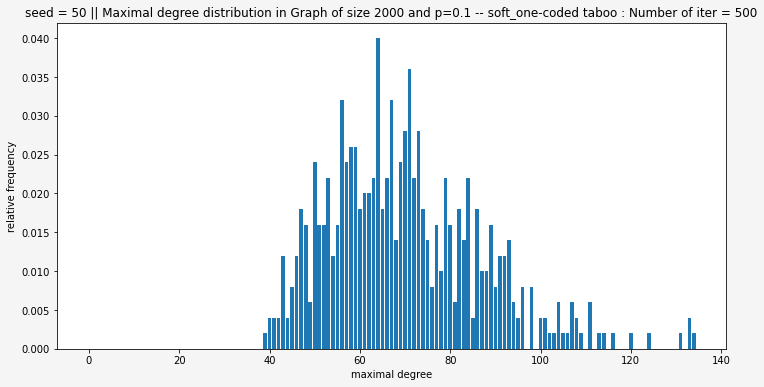

In [5]:
%%time
x35 = maximal_plot(2000,.1,500,mode = "soft_one",seed=50)

CPU times: user 1min 52s, sys: 5.91 s, total: 1min 58s
Wall time: 52min 54s


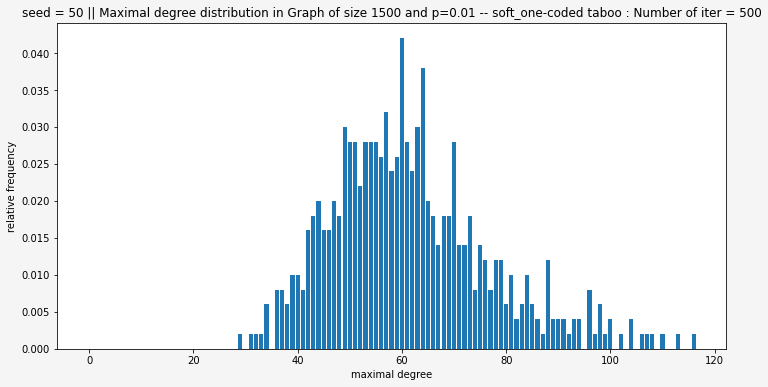

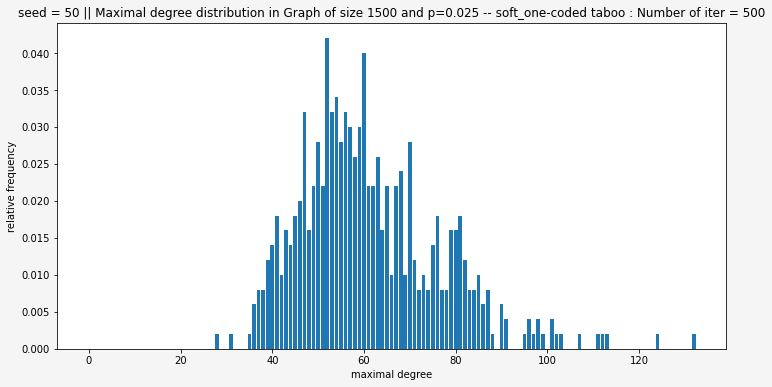

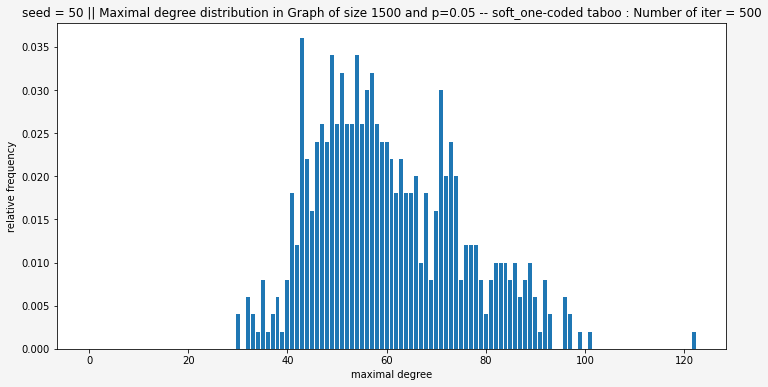

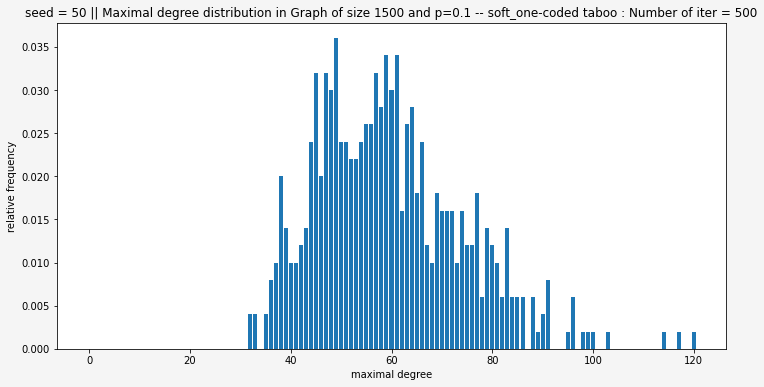

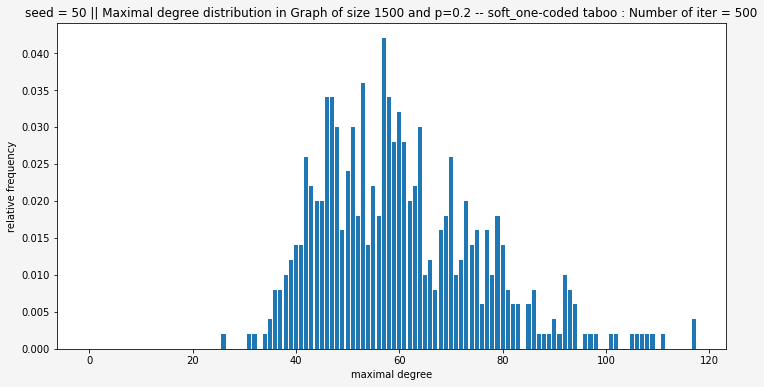

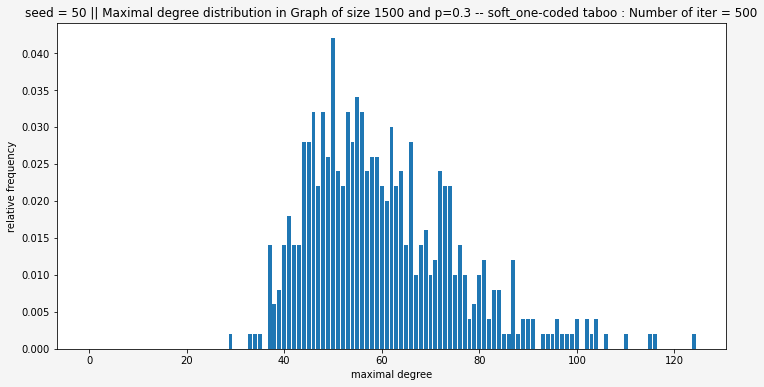

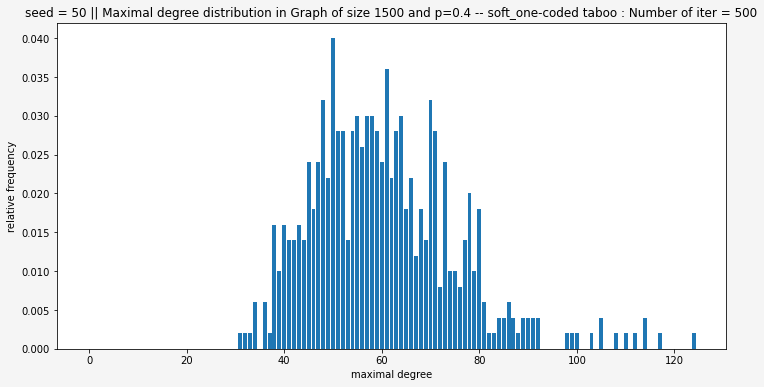

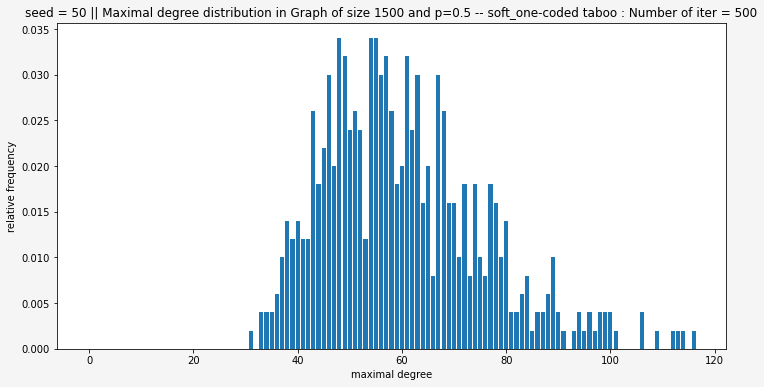

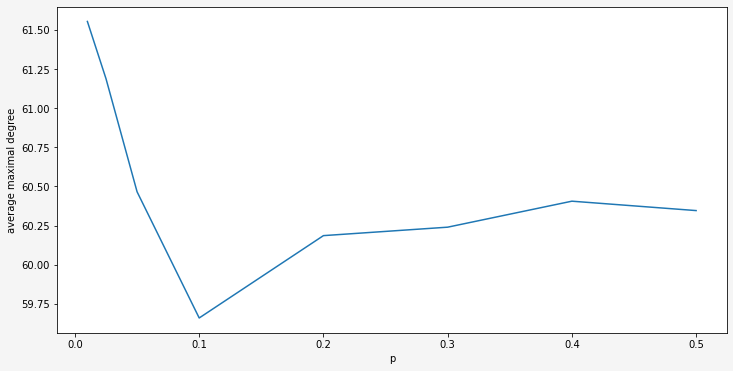

In [17]:
%%time
M_soft_onep = np.zeros((8,500))
p = [0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(0,len(p)):
  z = maximal_plot(1500, p[i], 500, mode = "soft_one", seed = 50)
  M_soft_onep[i] = z

means_soft_onep = np.sum(M_soft_onep, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(p,means_soft_onep); plt.xlabel("p"); plt.ylabel("average maximal degree")

### IRRELEVANT!!!!

CPU times: user 1min 37s, sys: 4.47 s, total: 1min 41s
Wall time: 38min 55s


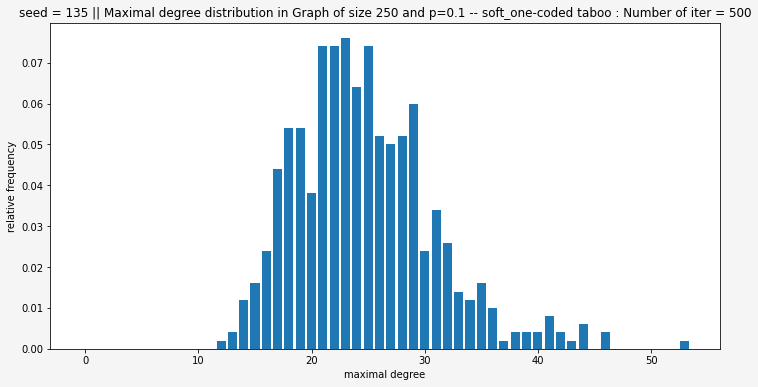

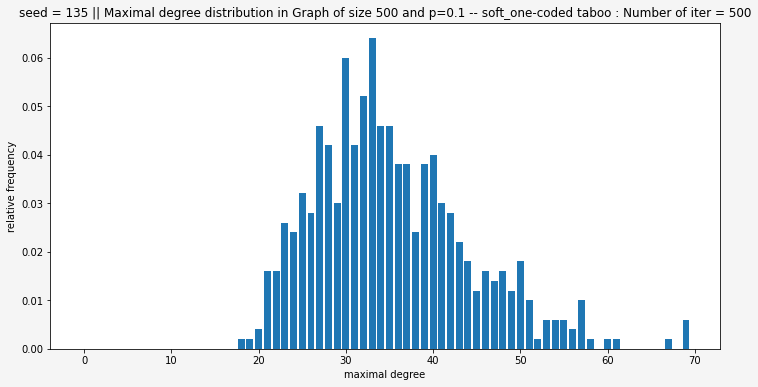

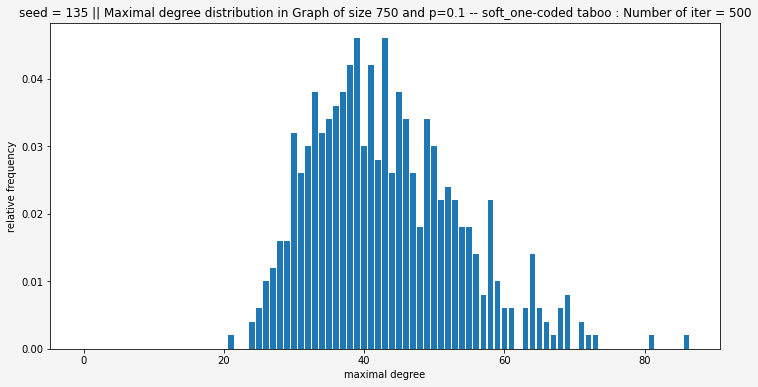

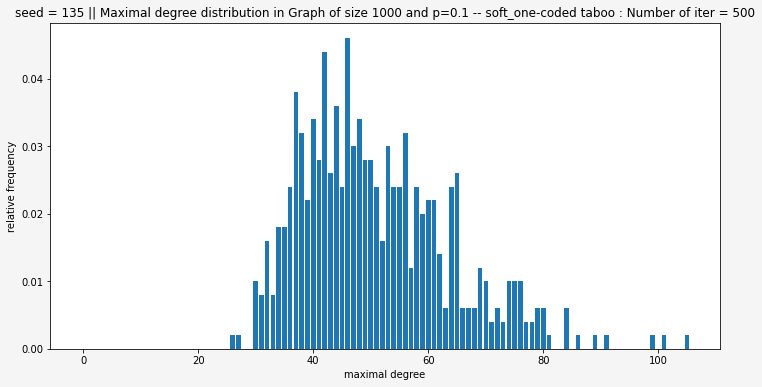

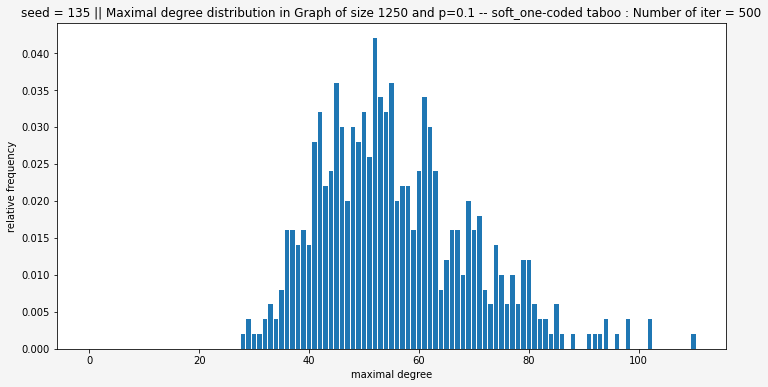

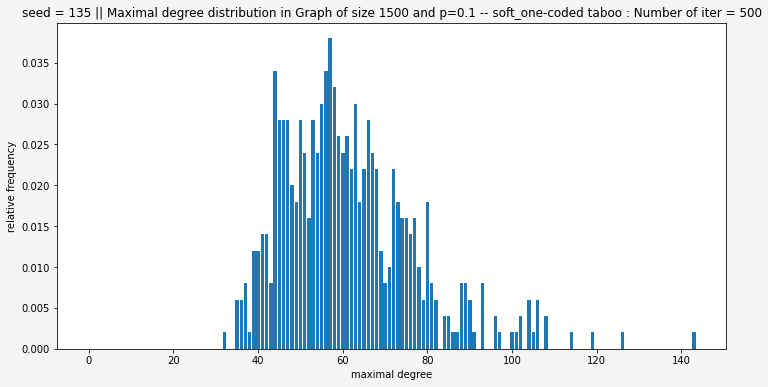

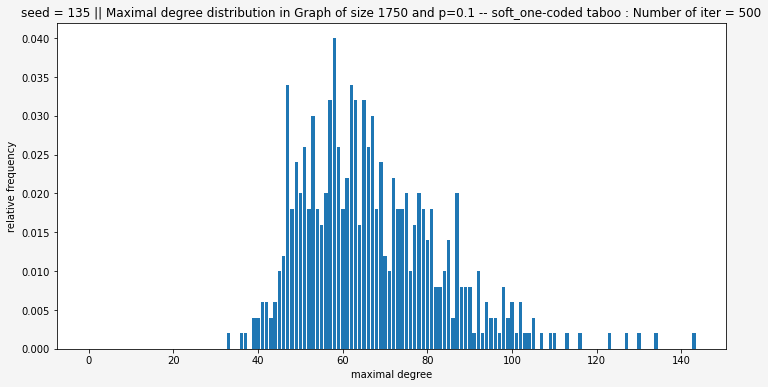

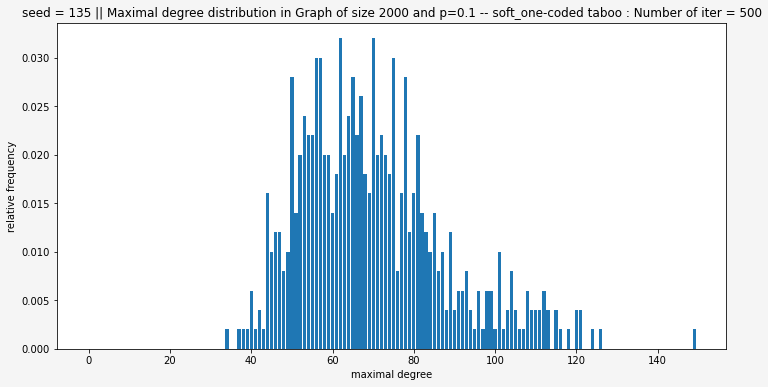

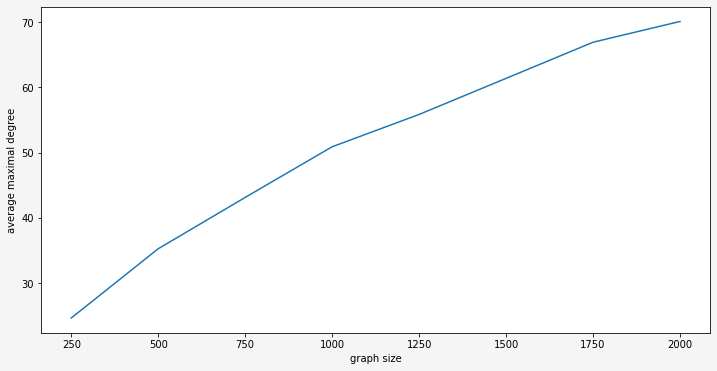

In [18]:
%%time
M_soft_oneN = np.zeros((8,500))
N = [250, 500, 750, 1000, 1250, 1500, 1750, 2000]
for i in range(0,len(N)):
  z = maximal_plot(N[i], 0.1, 500, mode = "soft_one", seed = 135)
  M_soft_oneN[i] = z
means_soft_oneN = np.sum(M_soft_oneN, axis = 1)/500
plt.figure(figsize = (12,6), facecolor = "whitesmoke")
plt.plot(N,means_soft_oneN); plt.xlabel("graph size"); plt.ylabel("average maximal degree")

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [19]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')